In [10]:
import pandas
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

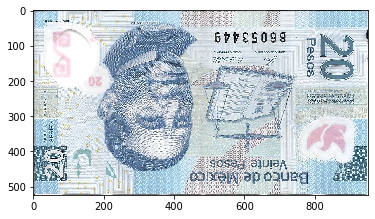

In [2]:
img = cv2.imread('../Datasets/billetes/MX020N_02b.jpg')

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
def img2features(file):
    img = cv2.imread(file)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    nrows,ncols,nch = img_hsv.shape
    
    Xhsv = np.reshape(img_hsv,(nrows*ncols,3))
    #plt.hist(Xhsv[:,0])
    #plt.show()
    h = np.histogram(Xhsv[:,0],bins=10,range=[0,180])[0]
    h = h/np.sum(h)
    h = np.round(h,2)
    return h
h = img2features('../Datasets/billetes/MX500N_02b.jpg')
print(h)

[0.55 0.29 0.   0.   0.   0.   0.   0.   0.   0.16]


In [4]:
files = []
X = []
Y = []
path = '../Datasets/billetes/' 
for d,dt in zip([20,50,100,200,500],['020','050','100','200','500']):
 for n in range(1,20):
    nt = str(n) if n>=10 else '0'+str(n)
    for lt in ['a','b','c','d']:
        filename = path+"MX"+dt+"N_"+nt+lt+".jpg"
        if os.path.isfile(filename):
            files.append(filename)
            X.append(img2features(filename))
            Y.append(d)
X = np.array(X)
Y = np.array(Y)
files = np.array(files)
print('X',X.shape)

X (375, 10)


In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)
model = MLPClassifier(random_state=42)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
print('accuracy_score',accuracy_score(ytest,ypred))
m = confusion_matrix(ytest, ypred).astype(float)
for i in range(len(m)):
    m[i,:] = m[i,:]/np.sum(m[i,:])
m = np.round(m,2)
df = pandas.DataFrame(m,columns=['020','050','100','200','500'],index=['020','050','100','200','500'])
df

accuracy_score 0.9469026548672567


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,020,050,100,200,500
020,1.0,0.0,0.00,0.0,0.00
050,0.0,1.0,0.00,0.0,0.00
100,0.0,0.0,0.71,0.0,0.29
200,0.0,0.0,0.00,1.0,0.00
500,0.0,0.0,0.00,0.0,1.00


In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
print('accuracy_score',accuracy_score(ytest,ypred))
m = confusion_matrix(ytest, ypred).astype(float)
for i in range(len(m)):
    m[i,:] = m[i,:]/np.sum(m[i,:])
m = np.round(m,2)
df = pandas.DataFrame(m,columns=['020','050','100','200','500'],index=['020','050','100','200','500'])
df

accuracy_score 0.9823008849557522


,020,050,100,200,500
020,1.0,0.0,0.0,0.0,0.0
050,0.0,1.0,0.0,0.0,0.0
100,0.0,0.0,0.9,0.0,0.1
200,0.0,0.0,0.0,1.0,0.0
500,0.0,0.0,0.0,0.0,1.0
